<a href="https://colab.research.google.com/github/Jonah-30/simple-number-sequence-rnn/blob/main/neuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries.

In [67]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Set up the dataset.

In [49]:
# generate the data
# one input is 5 numbers in order and the output is the fifth number
x = [[[(i + j) / 100] for i in range(5)] for j in range(100)]
y = [(i + 5) / 100 for i in range(100)]

# turn the data into numpy arrays
x = np.array(x, dtype=float)
y = np.array(y, dtype=float)

# print out the shapes
print('x shape: ', x.shape)
print('y shape: ', y.shape)

# split the dataset into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

x shape:  (100, 5, 1)
y shape:  (100,)


Define and structure the  model.

In [50]:
model = tf.keras.Sequential()

# add lstm layers
model.add(tf.keras.layers.LSTM((1), batch_input_shape=(None, None, 1), return_sequences=True))
model.add(tf.keras.layers.LSTM((1), return_sequences=False))

# compile the model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

# output model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, None, 1)           12        
_________________________________________________________________
lstm_8 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


Train the model.

In [51]:
history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))

Epoch 1/400
3/3 [==============================] - 3s 370ms/step - loss: 0.5546 - accuracy: 0.0000e+00 - val_loss: 0.4423 - val_accuracy: 0.0000e+00
Epoch 2/400
3/3 [==============================] - 0s 25ms/step - loss: 0.5492 - accuracy: 0.0000e+00 - val_loss: 0.4396 - val_accuracy: 0.0000e+00
Epoch 3/400
3/3 [==============================] - 0s 25ms/step - loss: 0.5617 - accuracy: 0.0000e+00 - val_loss: 0.4369 - val_accuracy: 0.0000e+00
Epoch 4/400
3/3 [==============================] - 0s 22ms/step - loss: 0.5338 - accuracy: 0.0000e+00 - val_loss: 0.4341 - val_accuracy: 0.0000e+00
Epoch 5/400
3/3 [==============================] - 0s 23ms/step - loss: 0.5226 - accuracy: 0.0000e+00 - val_loss: 0.4311 - val_accuracy: 0.0000e+00
Epoch 6/400
3/3 [==============================] - 0s 26ms/step - loss: 0.5266 - accuracy: 0.0000e+00 - val_loss: 0.4282 - val_accuracy: 0.0000e+00
Epoch 7/400
3/3 [==============================] - 0s 24ms/step - loss: 0.5168 - accuracy: 0.0000e+00 - val_los

Plot the loss overtime.

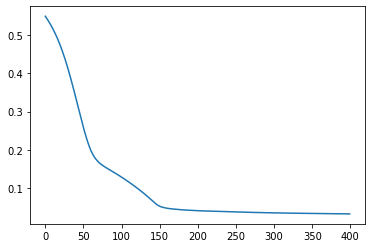

In [52]:
plt.plot(history.history['loss'])
plt.show()

Save model.

In [53]:
model.save('simple_number_sequence_rnn.model')
new_model = tf.keras.models.load_model('simple_number_sequence_rnn.model')

INFO:tensorflow:Assets written to: simple_number_sequence_rnn.model/assets


INFO:tensorflow:Assets written to: simple_number_sequence_rnn.model/assets


Plot the results.

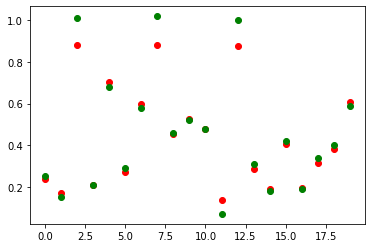

In [54]:
predictions = new_model.predict(x_test)
plt.scatter(range(20), predictions, c='r')
plt.scatter(range(20), y_test, c='g')
plt.show()

Print the predictions vs the real value.

In [68]:
for i in range(len(y_test)):
  print('Prediction: ',predictions[i, 0] * 100, '\nReal Value: ', round(y_test[i] * 100), '\n')

Prediction:  23.66858869791031 
Real Value:  25 

Prediction:  17.182007431983948 
Real Value:  15 

Prediction:  88.12189102172852 
Real Value:  101 

Prediction:  20.776286721229553 
Real Value:  21 

Prediction:  70.20455002784729 
Real Value:  68 

Prediction:  26.980438828468323 
Real Value:  29 

Prediction:  59.711962938308716 
Real Value:  58 

Prediction:  88.37144374847412 
Real Value:  102 

Prediction:  45.23565173149109 
Real Value:  46 

Prediction:  52.56466269493103 
Real Value:  52 

Prediction:  47.671619057655334 
Real Value:  48 

Prediction:  13.609886169433594 
Real Value:  7 

Prediction:  87.86132335662842 
Real Value:  100 

Prediction:  28.7945419549942 
Real Value:  31 

Prediction:  18.87209862470627 
Real Value:  18 

Prediction:  40.46523571014404 
Real Value:  42 

Prediction:  19.482387602329254 
Real Value:  19 

Prediction:  31.70780837535858 
Real Value:  34 

Prediction:  38.1600558757782 
Real Value:  40 

Prediction:  60.85623502731323 
Real Value: